# Лабораторная работа 3. Исследование надежности системы с смешанным соединением невосстанавливаемых элементов, отказы которых являются независимыми


Вариант 12

Лазарев Эдуард Артемович
N33471

## Схема системы

![system diagram](system_diagram.png)

## Интенсивности отказов элементов


|     i     ||    $\lambda_i, час^{-1}$   |||
| :-------: | :---: | :---: | :---: | :---: |
|           |   1   |   2   |   3   |   4   |
|     1     | 1/200 | 1/200 | 1/500 | 1/200 |
|     2     | 1/200 | 1/300 | 1/200 | 1/100 |
|     3     | 1/300 | 1/400 | 1/200 | 1/200 |
|     4     | 1/400 | 1/400 | 1/400 | 1/300 |
|     5     | 1/500 | 1/500 | 1/300 | 1/500 |
|     6     | 1/300 | 1/200 | 1/100 | 1/100 |
|     7     | 1/300 | 1/300 | 1/200 | 1/400 |
|     8     | 1/100 | 1/100 | 1/500 | 1/300 |
|     9     | 1/200 | 1/200 | 1/300 | 1/500 |
|     10    | 1/100 | 1/300 | 1/200 | 1/400 |
|     11    | 1/400 | 1/100 | 1/300 | 1/400 |
| $\lambda$ | 1/400 | 1/200 | 1/300 | 1/500 |
|  Вариант  | 1-5   | 6-10  | 11-15 | 16-20 |

## Формулы рассчёта функции надёжности системы

Расчитаем функцию надёжности системы, декомпозируя её на участки с последовательным и параллельным соединением:

$$
\begin{align*}
    p(t) &= 1 - q_{1,2,4,6,7,9,10}(t)q_{3,5,8}(t) = 1 - (1 - p_{1,2,4,6,7,9,10}(t))(1 - p_{3,5,8}(t)) \\
    p_{1,2,4,6,7,9,10}(t)) &= p_{1,2}(t)p_4(t)p_{6,7,9,10}(t) \\
    p_{1,2}(t) &= 1 - q_1(t)q_2(t) = 1 - (1 - p_1(t))(1 - p_2(t)) \\
    p_{6,7,9,10}(t) &= 1 - q_{6,9}(t)q_{7,10}(t) = 1 - (1 - p_{6,9}(t))(1 - p_{7,10}(t)) \\
    p_{6,9}(t) &= p_6(t)p_9(t) \\
    p_{7,10}(t) &= p_7(t)p_{10}(t) \\
    p_{3,5,8}(t) &= p_3(t)p_5(t)p_8(t)
\end{align*}
$$

В конечном итоге функция надёжности системы из варианта примет вид:
$$
p(t) = 1 - \bigg(1 - \Big(1 - \big(1 - p_1(t)\big)\big(1 - p_2(t)\big)\Big)p_4(t)\Big(1 - \big(1 - p_6(t)p_9(t)\big)\big(1 - p_7(t)p_{10}(t)\big)\Big)\bigg)\bigg(1 - p_3(t)p_5(t)p_8(t)\bigg)
$$

In [1]:
from matplotlib import pyplot as plt
from scipy import integrate
import numpy as np

Введём начальные значения для данного варианта.

In [2]:
# Варианты интенсивностей отказов элементов.
Lambdas = (
    [1/500, 1/200, 1/200, 1/400, 1/300, 1/100, 1/200, 1/500, 1/300, 1/200, 1/300],
    [1/300, 1/300, 1/300, 1/300, 1/300, 1/300, 1/300, 1/300, 1/300, 1/300, 1/300],
    [1/200, 1/100, 1/200, 1/300, 1/500, 1/100, 1/400, 1/300, 1/500, 1/400, 1/400],
)

Определим функцию обёртку, возращающую функцию надёжности одного элемента системы, и функцию обёртку, возращающую надёжности всей системы.

In [3]:
def get_p(lambda_: float):
    """Функция обёртка для создания функции надёжности элемента."""
    
    def p(t: float):
        """Функция надёжности элемента."""
        return np.exp(-lambda_ * t)
    
    return p

def get_p_c(lambdas: list):
    """Функция обёртка для создания функции надёжности всей системы."""

    def p_c(t: float):
        """Функция надёжности системы."""
        p_i = [get_p(lambda_) for lambda_ in lambdas]

        return (1 - 
                   (1 - 
                       (1 - 
                           (1 - p_i[0](t)) * 
                           (1 - p_i[1](t))
                       ) * 
                       p_i[3](t) * 
                       (1 - 
                           (1 - p_i[5](t) * p_i[8](t)) * 
                           (1 - p_i[6](t) * p_i[9](t))
                       )
                   ) * 
                   (1 - p_i[2](t) * p_i[4](t) * p_i[7](t))
               )

    return p_c

Выполним расчёты для разных наборов $\lambda$.

Среднее время безотказной работы: T_c=141.19 в наборе данных N1
Среднее время безотказной работы: T_c=163.10 в наборе данных N2
Среднее время безотказной работы: T_c=142.25 в наборе данных N3


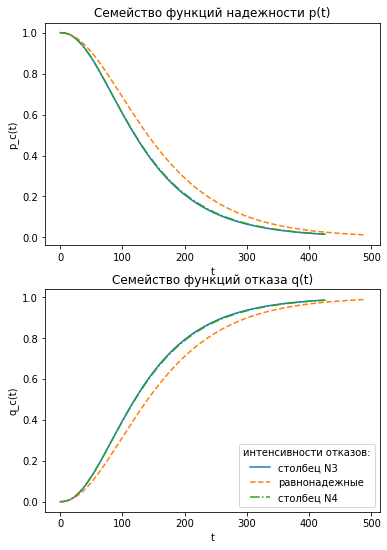

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(6,9))

axs[0].set_title('Семейство функций надежности p(t)')
axs[0].set_xlabel('t')
axs[0].set_ylabel('p_c(t)')

axs[1].set_title('Семейство функций отказа q(t)')
axs[1].set_xlabel('t')
axs[1].set_ylabel('q_c(t)')

for idx, (lambdas, line_type) in enumerate(zip(Lambdas, ["-", "--", "-."])):
    p_c = get_p_c(lambdas)

    T_c = integrate.quad(p_c, 0, np.inf)[0]

    xs = np.arange(0, T_c * 3, 0.05)
    p_cs = [p_c(t) for t in xs]
    q_cs = [1 - p_c(t) for t in xs]

    print(f"Среднее время безотказной работы: T_c={T_c:.2f} в наборе данных N{idx + 1}")

    axs[0].plot(xs, p_cs, line_type)
    axs[1].plot(xs, q_cs, line_type)

legend = ["столбец N3", "равнонадежные", "столбец N4"]
plt.legend(legend, title='интенсивности отказов:')

for ax in [axs[0], axs[1]]:
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(f"images/{ax.title.get_text()}.png", bbox_inches=extent.expanded(1.1, 1.2))